## Population and Displacement - Race ethnicity (% of different populations)

In this analysis, we explore Population Displacement Metrics with a focus on changes in demographics over time across various racial and ethnic groups. Using census data from 2014 to 2023, this notebook examines Population by Race and Ethnicity: Understanding the percentage distribution of different racial and ethnic populations helps identify groups disproportionately affected by housing, socioeconomic, and policy changes over time.


*The primary objective of this analysis is to identify the trends in population changes across various racial/ethnic groups.*


The dataset used in this analysis is derived from census data collected from 2014 to 2023. This dataset includes key demographic metrics, enabling a comprehensive view of population displacement trends over nearly a decade.

#### Importing libraries and performing Exploratory Data Analysis

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
df1 = pd.read_csv('Demographics(2023-2019).csv')

In [275]:
df2 = pd.read_csv('Demographics(2018-2014).csv')

In [277]:
df1["Label (Grouping)"] = df1["Label (Grouping)"].str.replace('\xa0', ' ').str.strip()
df2["Label (Grouping)"] = df2["Label (Grouping)"].str.replace('\xa0', ' ').str.strip()

df1 = df1.drop(columns=['Boston city, Suffolk County, Massachusetts!!2023 - 2022 Statistical Significance',
                                          'Boston city, Suffolk County, Massachusetts!!2023 - 2021 Statistical Significance',
                                          'Boston city, Suffolk County, Massachusetts!!2020 Estimate',
                                          'Boston city, Suffolk County, Massachusetts!!2023 - 2020 Statistical Significance',
                                          'Boston city, Suffolk County, Massachusetts!!2023 - 2019 Statistical Significance'])

df2 = df2.drop(columns=['Boston city, Suffolk County, Massachusetts!!2018 - 2017 Statistical Significance',
                                          'Boston city, Suffolk County, Massachusetts!!2018 - 2016 Statistical Significance',
                                          'Boston city, Suffolk County, Massachusetts!!2018 - 2015 Statistical Significance',
                                          'Boston city, Suffolk County, Massachusetts!!2018 - 2014 Statistical Significance'])

df1.columns = df1.columns.str.extract(r'(\d{4})', expand=False)
df2.columns = df2.columns.str.extract(r'(\d{4})', expand=False)

df1.rename(columns={np.nan: 'Labels'}, inplace=True)
df2.rename(columns={np.nan: 'Labels'}, inplace=True)

In [281]:
df2_race = df2.drop(columns=['Labels'])

In [447]:
race = pd.concat([df1, df2_race], axis=1)

In [285]:
race

,Labels,2023,2022,2021,2019,2018,2017,2016,2015,2014
0,SEX AND AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total population,"652,442","649,768","654,281","694,295","695,926","683,015","672,840","669,469","656,051"
2,Male,48.1%,48.5%,48.2%,47.8%,48.0%,48.3%,48.0%,48.1%,48.2%
3,Female,51.9%,51.5%,51.8%,52.2%,52.0%,51.7%,52.0%,51.9%,51.8%
4,Sex ratio (males per 100 females),92.8,94.1,92.9,91.7,92.2,93.4,92.4,92.8,93.0
...,...,...,...,...,...,...,...,...,...,...
94,Total housing units,"313,752","307,836","307,025","303,791",NaN,NaN,NaN,NaN,NaN
95,"CITIZEN, VOTING AGE POPULATION",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,"Citizen, 18 and over population","478,610","479,717","475,111","496,231",NaN,NaN,NaN,NaN,NaN
97,Male,46.7%,46.7%,47.1%,46.6%,NaN,NaN,NaN,NaN,NaN


In [139]:
r1 = race.iloc[34:37]

In [141]:
r1

,Labels,2023,2022,2021,2019,2018,2017,2016,2015,2014
34,Total population,"652,442","649,768","654,281","694,295","695,926","683,015","672,840","669,469","656,051"
35,One race,85.8%,84.5%,83.0%,93.7%,94.2%,95.9%,94.3%,95.5%,95.2%
36,Two or More Races,14.2%,15.5%,17.0%,6.3%,5.8%,4.1%,5.7%,4.5%,4.8%


#### Plotting trend of population on race

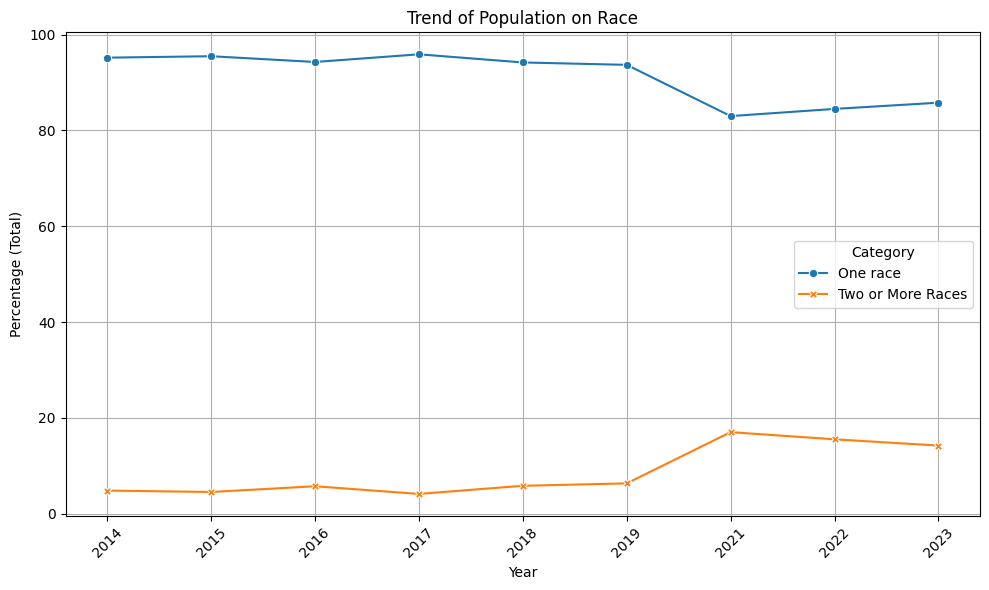

In [487]:
g1 = r1.iloc[[1, 2]].copy()

# Remove the '%' sign and convert to numeric values
for col in g1.columns[1:]:
    g1[col] = g1[col].str.rstrip('%').astype(float)

# Set the labels as the index
g1.set_index('Labels', inplace=True)

# Transpose the dataframe for plotting
g1 = g1.T

g1 = g1.sort_index(ascending=True)

# Plot the trends using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(data=g1, markers=True, dashes=False)

# Add plot labels and title
plt.title('Trend of Population on Race')
plt.xlabel('Year')
plt.ylabel('Percentage (Total)')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [207]:
r2 = race.iloc[38:41]

In [209]:
r2

,Labels,2023,2022,2021,2019,2018,2017,2016,2015,2014
38,White,46.1%,45.2%,45.6%,53.2%,52.5%,52.8%,53.2%,52.7%,53.0%
39,Black or African American,20.3%,21.2%,20.0%,24.9%,24.5%,25.9%,25.8%,25.3%,24.5%
40,American Indian and Alaska Native,0.2%,0.6%,0.2%,0.3%,0.3%,0.3%,0.3%,0.2%,0.4%


#### Plotting trend of particular population race over the years

In [451]:
asian1 = df1.iloc[49:56]
asian2 = df2.iloc[46:53]

In [453]:
asian = pd.merge(asian1, asian2, on='Labels')
asian

,Labels,2023,2022,2021,2019,2018,2017,2016,2015,2014
0,Asian Indian,1.7%,1.7%,1.3%,1.7%,1.5%,1.4%,1.8%,1.2%,1.1%
1,Chinese,4.5%,4.4%,4.7%,5.3%,4.7%,4.7%,4.8%,4.9%,4.9%
2,Filipino,0.5%,0.2%,0.3%,0.3%,0.3%,0.3%,0.2%,0.2%,0.2%
3,Japanese,0.1%,0.0%,0.3%,0.2%,0.2%,0.3%,0.2%,0.1%,0.2%
4,Korean,0.7%,0.8%,0.6%,0.5%,0.4%,0.5%,0.4%,0.7%,0.4%
5,Vietnamese,1.8%,1.6%,1.7%,1.2%,1.6%,1.8%,1.7%,2.0%,1.8%
6,Other Asian,1.1%,1.1%,0.7%,0.5%,0.7%,0.6%,0.7%,0.5%,1.0%


In [455]:
other1 = df1.iloc[[61]]
other2 = df2.iloc[[58]]
other2['Labels'] = other2['Labels'].replace('Some other race', 'Some Other Race')

/var/folders/9x/vzd90kdj3r31m970q9mvrq6w0000gn/T/ipykernel_10256/4127604266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other2['Labels'] = other2['Labels'].replace('Some other race', 'Some Other Race')


In [457]:
other = pd.merge(other1, other2, on='Labels')
other

,Labels,2023,2022,2021,2019,2018,2017,2016,2015,2014
0,Some Other Race,8.6%,7.6%,7.5%,5.4%,7.3%,7.2%,5.2%,7.8%,7.5%


In [459]:
one_race = pd.concat([r2, asian, other], ignore_index=True)

In [461]:
one_race

,Labels,2023,2022,2021,2019,2018,2017,2016,2015,2014
0,White,46.1%,45.2%,45.6%,53.2%,52.5%,52.8%,53.2%,52.7%,53.0%
1,Black or African American,20.3%,21.2%,20.0%,24.9%,24.5%,25.9%,25.8%,25.3%,24.5%
2,American Indian and Alaska Native,0.2%,0.6%,0.2%,0.3%,0.3%,0.3%,0.3%,0.2%,0.4%
3,Asian Indian,1.7%,1.7%,1.3%,1.7%,1.5%,1.4%,1.8%,1.2%,1.1%
4,Chinese,4.5%,4.4%,4.7%,5.3%,4.7%,4.7%,4.8%,4.9%,4.9%
5,Filipino,0.5%,0.2%,0.3%,0.3%,0.3%,0.3%,0.2%,0.2%,0.2%
6,Japanese,0.1%,0.0%,0.3%,0.2%,0.2%,0.3%,0.2%,0.1%,0.2%
7,Korean,0.7%,0.8%,0.6%,0.5%,0.4%,0.5%,0.4%,0.7%,0.4%
8,Vietnamese,1.8%,1.6%,1.7%,1.2%,1.6%,1.8%,1.7%,2.0%,1.8%
9,Other Asian,1.1%,1.1%,0.7%,0.5%,0.7%,0.6%,0.7%,0.5%,1.0%


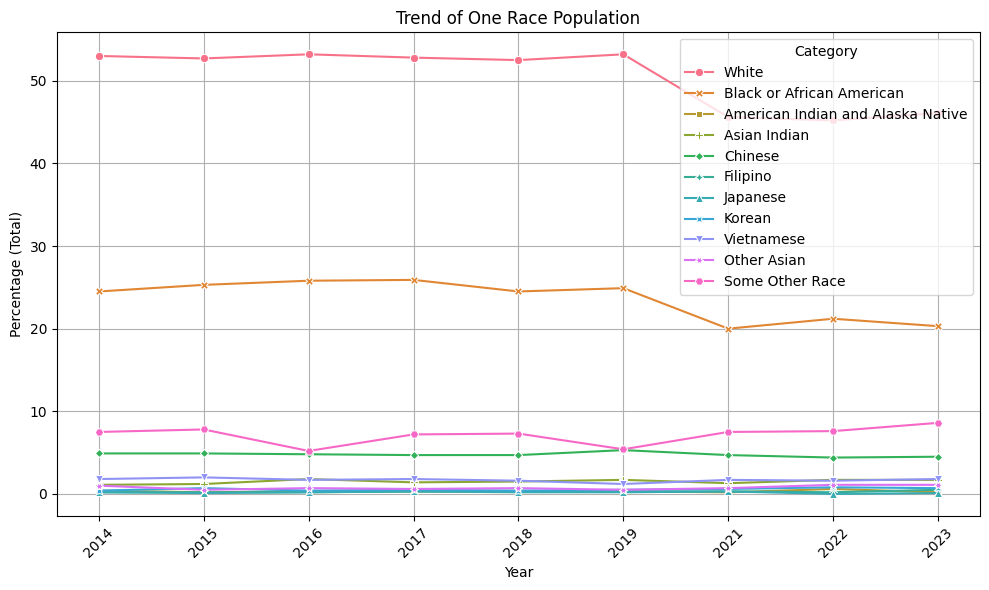

In [489]:
g2 = one_race.copy()

# Remove the '%' sign and convert to numeric values
for col in g2.columns[1:]:
    g2[col] = g2[col].str.rstrip('%').astype(float)

# Set the labels as the index
g2.set_index('Labels', inplace=True)

# Transpose the dataframe for plotting
g2 = g2.T

g2 = g2.sort_index(ascending=True)


# Plot the trends using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(data=g2, markers=True, dashes=False)

# Add plot labels and title
plt.title('Trend of One Race Population')
plt.xlabel('Year')
plt.ylabel('Percentage (Total)')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

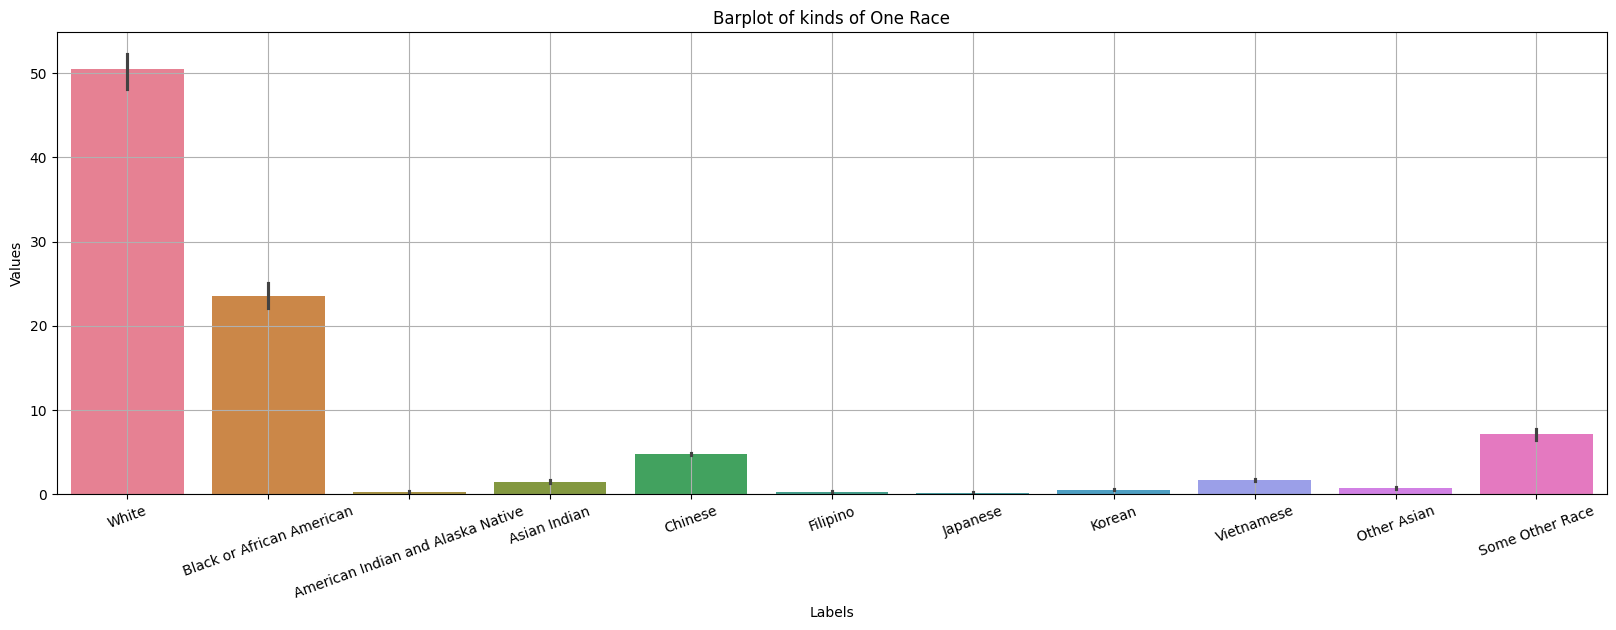

In [525]:
plt.figure(figsize=(20, 6))
sns.barplot(data=g2)

plt.title('Barplot of kinds of One Race')
plt.ylabel('Values')
plt.xticks(rotation=20)
plt.grid(True)
plt.show()

#### Plotting the trend of Asian Population

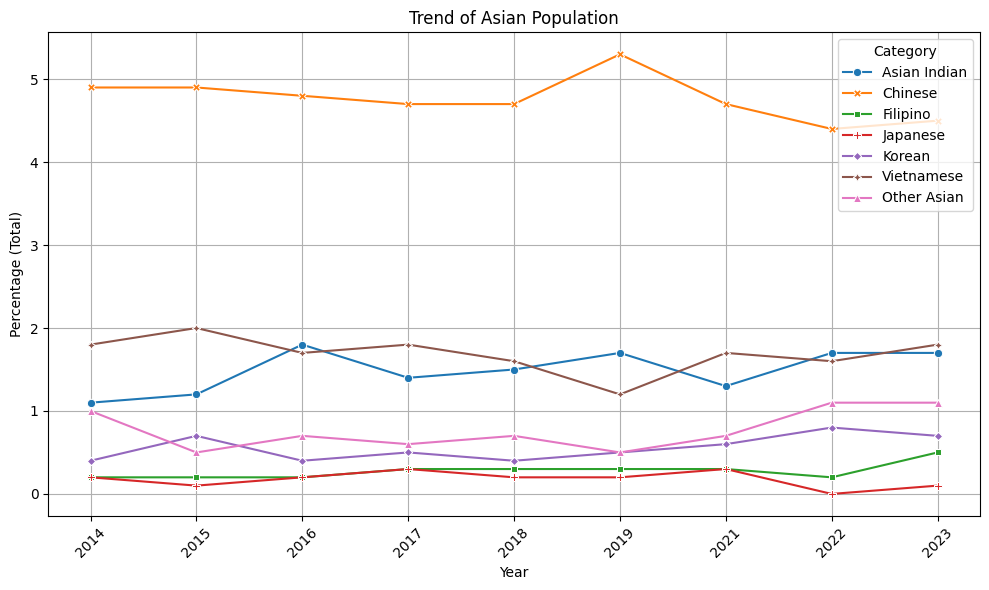

In [493]:
g3 = asian.copy()

# Remove the '%' sign and convert to numeric values
for col in g3.columns[1:]:
    g3[col] = g3[col].str.rstrip('%').astype(float)

# Set the labels as the index
g3.set_index('Labels', inplace=True)

# Transpose the dataframe for plotting
g3 = g3.T

g3 = g3.sort_index(ascending=True)


# Plot the trends using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(data=g3, markers=True, dashes=False)

# Add plot labels and title
plt.title('Trend of Asian Population')
plt.xlabel('Year')
plt.ylabel('Percentage (Total)')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

#### Plotting the trend of two or more races together over the years

In [501]:
extra1 = df1.iloc[63:66]
extra2 = df1.iloc[[67]]
two_or_more1 = pd.concat([extra1, extra2], ignore_index=True)

In [503]:
two_or_more2 = df2.iloc[60:64]

In [505]:
two_or_more = pd.merge(two_or_more1, two_or_more2, on='Labels')
two_or_more

,Labels,2023,2022,2021,2019,2018,2017,2016,2015,2014
0,White and Black or African American,1.4%,1.2%,1.0%,3.6%,3.1%,2.4%,3.7%,2.2%,2.5%
1,White and American Indian and Alaska Native,0.4%,0.2%,0.3%,0.3%,0.2%,0.2%,0.2%,0.3%,0.3%
2,White and Asian,1.0%,1.0%,1.0%,0.9%,0.9%,0.7%,0.6%,0.7%,0.6%
3,Black or African American and American Indian ...,0.3%,0.3%,0.3%,0.1%,0.2%,0.3%,0.1%,0.1%,0.1%


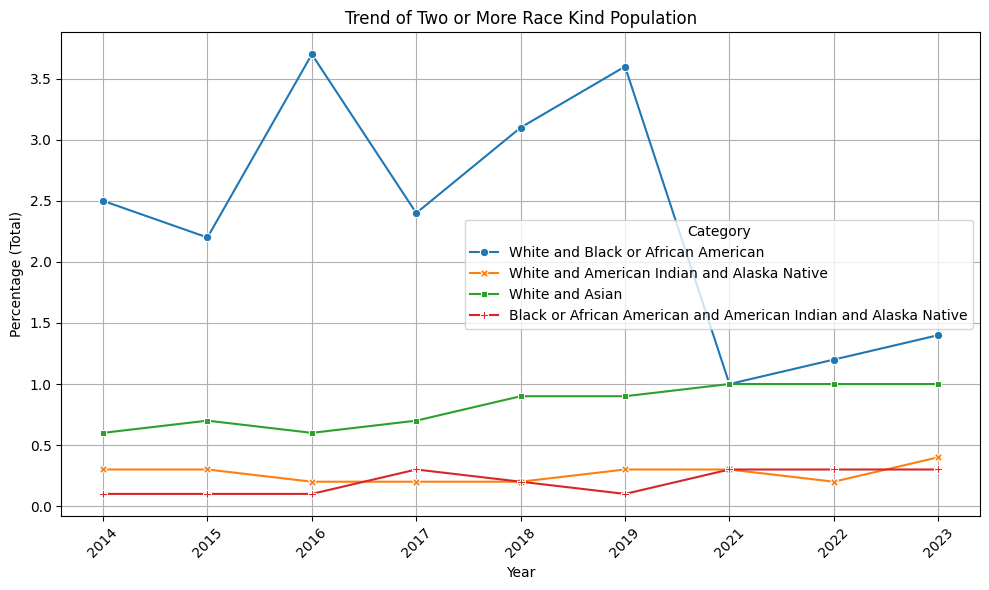

In [507]:
g4 = two_or_more.copy()

# Remove the '%' sign and convert to numeric values
for col in g4.columns[1:]:
    g4[col] = g4[col].str.rstrip('%').astype(float)

# Set the labels as the index
g4.set_index('Labels', inplace=True)

# Transpose the dataframe for plotting
g4 = g4.T

g4 = g4.sort_index(ascending=True)


# Plot the trends using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(data=g4, markers=True, dashes=False)

# Add plot labels and title
plt.title('Trend of Two or More Race Kind Population')
plt.xlabel('Year')
plt.ylabel('Percentage (Total)')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [477]:
one_and_more1 = df1.iloc[71:77]

In [479]:
one_and_more2 = df2.iloc[66:72]
one_and_more2['Labels'] = one_and_more2['Labels'].replace('Some other race', 'Some Other Race')

/var/folders/9x/vzd90kdj3r31m970q9mvrq6w0000gn/T/ipykernel_10256/3090201655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_and_more2['Labels'] = one_and_more2['Labels'].replace('Some other race', 'Some Other Race')


In [483]:
one_and_more = pd.merge(one_and_more1, one_and_more2, on='Labels')
one_and_more

,Labels,2023,2022,2021,2019,2018,2017,2016,2015,2014
0,White,56.6%,55.8%,58.0%,58.6%,57.4%,56.5%,58.3%,56.5%,57.2%
1,Black or African American,26.6%,28.8%,28.8%,29.4%,28.6%,28.8%,30.2%,28.3%,27.6%
2,American Indian and Alaska Native,1.4%,1.5%,1.5%,0.9%,0.9%,0.9%,0.9%,0.8%,0.8%
3,Asian,12.1%,11.2%,11.0%,11.1%,10.8%,10.6%,10.8%,10.5%,10.8%
4,Native Hawaiian and Other Pacific Islander,0.3%,0.1%,0.1%,0.3%,0.1%,0.1%,0.1%,0.1%,0.3%
5,Some Other Race,19.3%,20.0%,21.3%,6.3%,8.4%,7.5%,5.7%,8.6%,8.5%


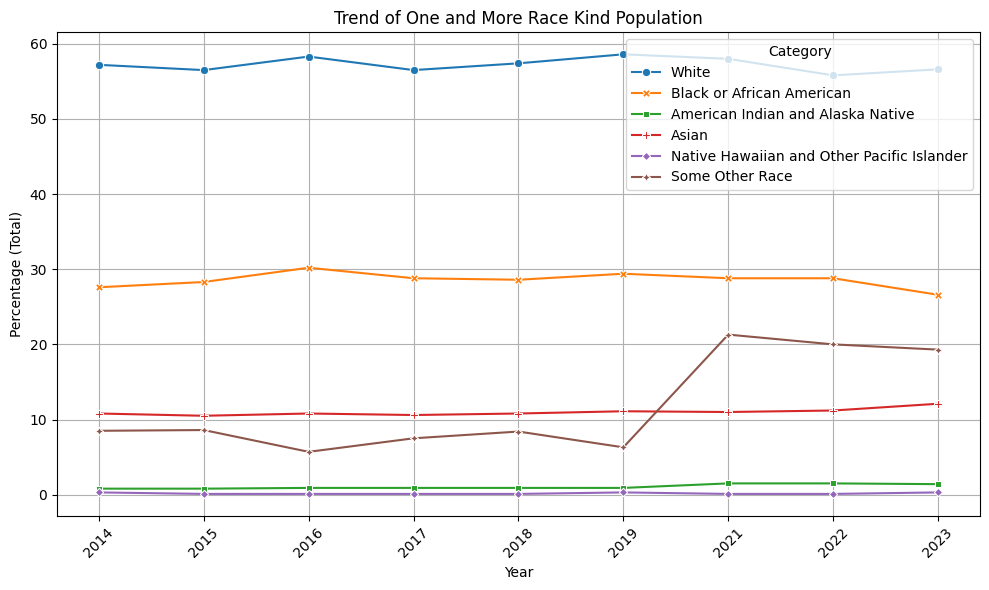

In [509]:
g5 = one_and_more.copy()

# Remove the '%' sign and convert to numeric values
for col in g5.columns[1:]:
    g5[col] = g5[col].str.rstrip('%').astype(float)

# Set the labels as the index
g5.set_index('Labels', inplace=True)

# Transpose the dataframe for plotting
g5 = g5.T

g5 = g5.sort_index(ascending=True)


# Plot the trends using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(data=g5, markers=True, dashes=False)

# Add plot labels and title
plt.title('Trend of One and More Race Kind Population')
plt.xlabel('Year')
plt.ylabel('Percentage (Total)')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

#### Plotting the trend of Latino population

In [513]:
latino1 = df1.iloc[80:84]

In [515]:
latino2 = df2.iloc[75:79]

In [521]:
latino = pd.merge(latino1, latino2, on='Labels')
latino

,Labels,2023,2022,2021,2019,2018,2017,2016,2015,2014
0,Mexican,1.4%,1.3%,1.1%,1.3%,1.3%,1.0%,1.1%,1.0%,1.0%
1,Puerto Rican,4.4%,4.0%,4.6%,4.8%,4.7%,6.2%,4.8%,5.6%,5.0%
2,Cuban,0.3%,0.2%,0.3%,0.7%,0.5%,0.4%,0.4%,0.4%,0.3%
3,Other Hispanic or Latino,13.3%,14.5%,14.4%,12.9%,13.5%,12.9%,12.8%,12.5%,12.3%


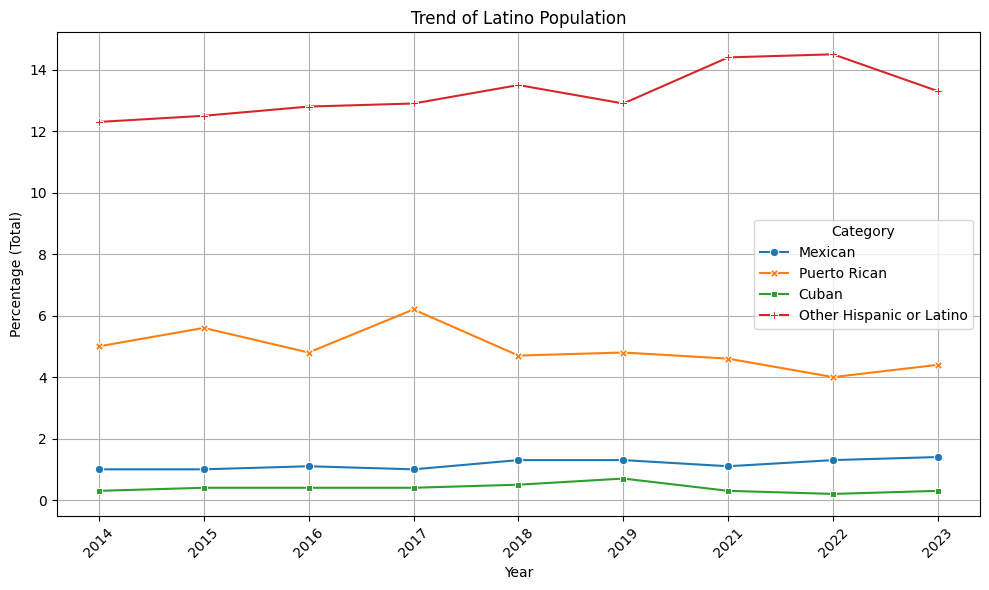

In [523]:
g6 = latino.copy()

# Remove the '%' sign and convert to numeric values
for col in g6.columns[1:]:
    g6[col] = g6[col].str.rstrip('%').astype(float)

# Set the labels as the index
g6.set_index('Labels', inplace=True)

# Transpose the dataframe for plotting
g6 = g6.T

g6 = g6.sort_index(ascending=True)


# Plot the trends using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(data=g6, markers=True, dashes=False)

# Add plot labels and title
plt.title('Trend of Latino Population')
plt.xlabel('Year')
plt.ylabel('Percentage (Total)')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()